In [2]:
import pandas as pd 

url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

data = pd.read_csv(url)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
renomear = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_gastas',
    'price' : 'preco'
}

data = data.rename(columns=renomear)

data.head()

,nao_finalizado,horas_gastas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
troca = {
    1 : 0,
    0 : 1
}
data['finalizado'] = data['nao_finalizado'].map(troca)
data.tail()

,nao_finalizado,horas_gastas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='horas_gastas', ylabel='preco'>

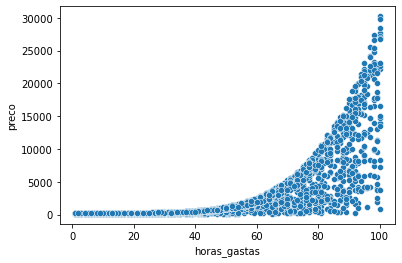

In [9]:
# Visualizar os dados com seaborn
import seaborn as sns

sns.scatterplot(x = 'horas_gastas', y = 'preco' , data = data)

<AxesSubplot:xlabel='horas_gastas', ylabel='preco'>

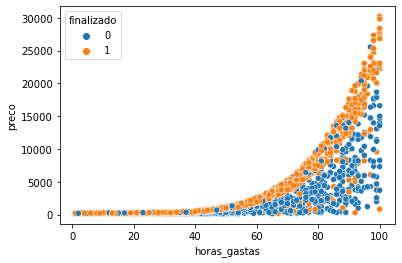

In [10]:
# colocando cor no grafico

sns.scatterplot(x = 'horas_gastas', y = 'preco', hue= 'finalizado', data = data)

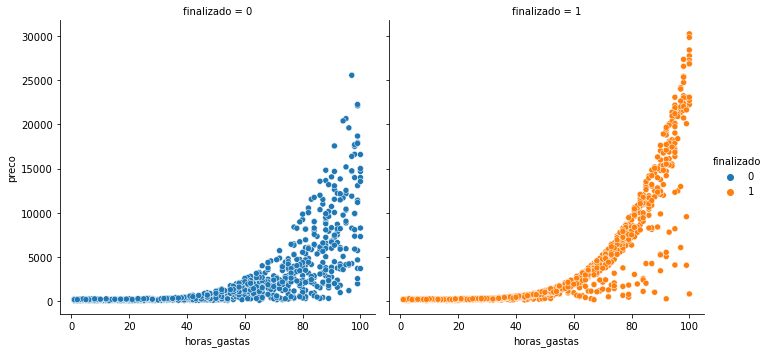

In [12]:
sns.relplot(x = 'horas_gastas', y = 'preco', col= 'finalizado', hue = 'finalizado', data = data)

In [28]:
# separando os dados para o modelo

x = data[['horas_gastas', 'preco']]
y = data['finalizado']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state= SEED, stratify = y, test_size = 0.25)
print("Treino com %d elementos e testaremos com %d elementos." % (len(treino_x), len(teste_x)))

model = LinearSVC(random_state = SEED)
model.fit(treino_x, treino_y)

previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia é %4.f%%" % acuracia)

Treino com 1617 elementos e testaremos com 540 elementos.
A acurácia é   54%


C:\Users\Rado\anaconda3\envs\estudos\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
import numpy as np
previsoes_da_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_da_base) * 100
print("A acurácia de um treino em baseline foi %.2f%%" % acuracia)

A acurácia de um treino em baseline foi 52.59%


<AxesSubplot:xlabel='horas_gastas', ylabel='preco'>

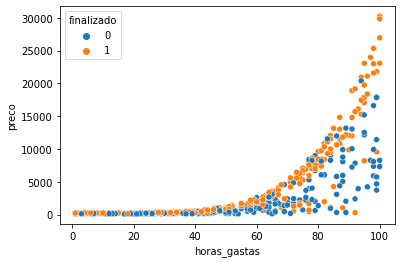

In [58]:
sns.scatterplot(x="horas_gastas", y="preco", hue=teste_y, data=teste_x) 

In [59]:
x_min = teste_x.horas_gastas.min()
x_max = teste_x.horas_gastas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [60]:
pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [61]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [62]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [63]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [64]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [65]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

C:\Users\Rado\anaconda3\envs\estudos\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

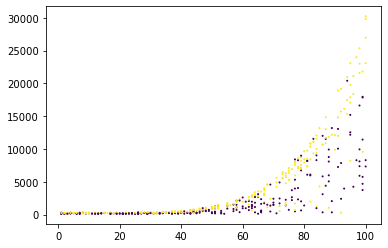

In [66]:
#plotando o grafico

import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_gastas, teste_x.preco, c=teste_y, s = 1)

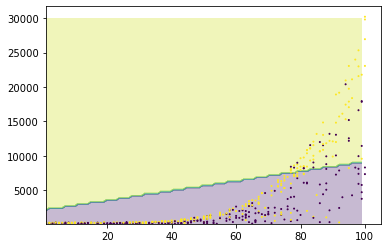

In [67]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_gastas, teste_x.preco, c=teste_y, s = 1)